In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import fnmatch

Wetterdatenzusammenfügen


In [67]:

directory = 'Daten/test'

df_all = pd.DataFrame()

# Durchlaufe jede außer der Zugspitze CSV-Datei im Verzeichnis
for filename in os.listdir(directory):
    if not fnmatch.fnmatch(filename, '5792*'):
        df = pd.read_csv(f"{directory}/{filename}")
        df["Datum"] = pd.to_datetime(df['Datum']) 
        df_all = pd.concat([df_all, df], ignore_index=True)

print(len(df_all))

13758


In [68]:
df_all[(df_all['Datum'].dt.month == 6) & (df_all['Datum'].dt.year == 2012)]

,Datum,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
1333,2012-06-01,10.410000,2.740000,4.593333,3.200000,6.996667,NaN,4.806667,15.290000,987.126667,18.233333,74.000000,23.756667,12.253333,10.373333
2495,2012-06-01,11.653333,3.850000,1.770000,4.266667,5.733333,0.0,5.703333,12.380000,1011.590000,15.343333,70.866667,19.763333,10.833333,8.736667
3551,2012-06-01,11.453333,3.920000,2.576667,5.400000,4.940000,0.0,5.853333,12.643333,1010.716667,14.553333,75.966667,19.056667,9.803333,7.590000
5195,2012-06-01,13.316667,6.223333,3.340000,5.066667,6.280000,0.0,5.706667,12.800000,1010.246667,14.076667,78.433333,16.416667,11.946667,10.750000
6098,2012-06-01,NaN,NaN,1.993333,2.400000,6.403333,NaN,NaN,14.076667,NaN,17.820000,69.200000,22.856667,13.006667,11.896667
6863,2012-06-01,NaN,NaN,5.060000,2.533333,NaN,NaN,NaN,14.426667,NaN,15.930000,80.433333,22.153333,10.140000,8.826667
7409,2012-06-01,NaN,NaN,3.003333,2.533333,NaN,NaN,NaN,13.770000,NaN,16.083333,75.333333,20.880000,11.563333,9.363333
8321,2012-06-01,10.133333,3.530000,2.720000,3.200000,5.203333,NaN,NaN,12.836667,1007.210000,16.786667,67.733333,21.320000,12.146667,7.906667
9013,2012-06-01,NaN,NaN,2.296667,2.666667,NaN,NaN,NaN,13.330000,NaN,14.740000,79.433333,19.873333,9.076667,7.276667
9629,2012-06-01,NaN,NaN,3.366667,2.933333,3.943333,NaN,NaN,13.526667,NaN,14.903333,79.666667,19.436667,10.313333,7.676667


In [69]:
df_all = df_all[df_all['Datum'] >= pd.to_datetime('1994-01-01')]


In [70]:
df_all.groupby("Datum").mean().reset_index()

,Datum,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
0,1994-01-01,14.071774,5.057258,2.795782,5.486352,1.311144,0.151365,6.479839,6.886600,997.984793,3.672953,85.047974,5.916377,1.414392,0.717866
1,1994-02-01,10.075000,3.449554,1.141964,4.035714,2.653896,1.014881,5.649026,5.324107,1004.696939,0.630060,78.351190,3.680952,-2.300298,-3.418155
2,1994-03-01,15.394355,5.403629,2.994086,5.188172,3.324340,0.087977,5.948387,7.915054,1001.647005,7.033871,77.814516,10.606183,3.848118,2.737634
3,1994-04-01,11.639167,3.783491,2.183077,3.853846,5.265758,0.002778,5.377500,8.376410,999.086190,8.659231,73.815385,13.159231,4.421795,2.754103
4,1994-05-01,11.184940,3.308871,2.651344,3.688172,6.367419,0.000000,5.188441,10.832258,1001.759447,12.976882,72.381720,17.586828,8.280376,6.693817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2023-08-01,10.547367,3.463441,3.259362,3.378507,6.159059,0.000000,5.754938,16.597022,1004.897669,18.614358,77.840132,23.640591,14.170968,12.602151
356,2023-09-01,9.181284,2.985000,1.035579,1.697436,8.163778,0.000000,4.349549,15.090513,1009.378952,17.929744,74.878872,24.167222,12.198889,9.921944
357,2023-10-01,11.467742,4.128495,3.715939,3.721489,3.082645,0.000000,6.738168,11.920596,1001.775622,12.312159,82.777270,16.383333,8.466667,6.607796
358,2023-11-01,12.308889,4.618333,3.848974,4.700000,1.301105,0.327160,6.900532,8.368090,996.400905,6.273333,85.508649,8.803056,3.590833,1.729306


In [72]:
df_all.to_csv("Daten/alle_stationen_aggregiert.csv", index=False)


In [74]:
df = pd.read_csv("Daten/alle_stationen_aggregiert.csv")
df

,Datum,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
0,1994-01-01,11.338710,4.329032,2.764516,5.322581,2.138710,0.032258,6.361290,6.825806,981.074194,4.696774,78.548387,7.219355,2.229032,1.441935
1,1994-02-01,9.275000,2.928571,2.117857,4.892857,2.275000,0.178571,6.428571,6.492857,978.878571,4.485714,75.714286,7.539286,1.775000,0.875000
2,1994-03-01,12.632258,4.941935,1.783871,4.903226,3.703226,0.000000,6.270968,8.635484,984.861290,10.880645,66.483871,14.658065,7.754839,6.325806
3,1994-04-01,9.660000,3.737931,2.830000,5.666667,4.170000,0.000000,6.440000,8.466667,977.240000,9.546667,70.733333,13.856667,5.823333,4.586667
4,1994-05-01,11.887097,2.896774,5.706452,4.258065,5.932258,0.000000,5.770968,12.112903,978.580645,15.151613,71.258065,19.845161,11.058065,9.890323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,2023-08-01,8.980645,2.303226,2.083871,4.451613,5.707000,0.000000,5.916129,17.077419,1005.043548,19.922581,74.730645,25.296774,14.767742,13.054839
4602,2023-09-01,7.637931,1.970000,0.336667,1.400000,8.569500,0.000000,4.133333,14.710000,1010.045333,18.353333,72.484333,25.750000,11.080000,8.473333
4603,2023-10-01,9.270968,2.706452,3.116129,5.225806,2.825903,0.000000,7.400000,11.809677,1002.663226,12.406452,82.407097,16.619355,8.261290,6.583871
4604,2023-11-01,10.186667,3.223333,2.426667,6.133333,1.558867,0.533333,7.103333,8.016667,997.432000,5.940000,83.770000,8.906667,2.643333,0.703333


In [85]:
df_gastro = pd.read_csv("Daten/cleaned_data/gastro_filtered.csv")
df_weather = pd.read_csv("Daten/alle_stationen_aggregiert.csv")
df_camping = pd.read_csv("Daten/cleaned_data/Gastro_Filter_v2.csv")
df_camping = df_camping[df_camping['Gastro_Description'] == 'Campingplätze']
df_camping['Datum'] = pd.to_datetime(df_camping['Datum'])
df_camping.set_index('Datum', inplace=True)
df_camping


,Gastro_Id,Gastro_Description,Umsatz in millionen
Datum,,,
1994-01-01,WZ08-553,Campingplätze,68.4
1994-02-01,WZ08-553,Campingplätze,52.2
1994-03-01,WZ08-553,Campingplätze,81.8
1994-04-01,WZ08-553,Campingplätze,119.4
1994-05-01,WZ08-553,Campingplätze,99.7
...,...,...,...
2023-09-01,WZ08-553,Campingplätze,146.8
2023-10-01,WZ08-553,Campingplätze,96.1
2023-11-01,WZ08-553,Campingplätze,45.3


In [86]:
df_gastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3971 non-null   int64  
 1   Jahr                 3971 non-null   int64  
 2   Monatscode           3971 non-null   object 
 3   Monat                3971 non-null   object 
 4   Gastro_Id            3971 non-null   object 
 5   Gastro_Description   3971 non-null   object 
 6   Umsatz in millionen  3971 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 217.3+ KB


In [87]:
df_gastro

,ID,Jahr,Monatscode,Monat,Gastro_Id,Gastro_Description,Umsatz in millionen
0,0,1994,MONAT01,Januar,WZ08-55,Beherbergung,92.3
1,1,1994,MONAT01,Januar,WZ08-551,"Hotels, Gasthöfe und Pensionen",91.9
2,2,1994,MONAT01,Januar,WZ08-552,Ferienunterkünfte u. ähnliche Beherbergungsstä...,97.3
3,3,1994,MONAT01,Januar,WZ08-553,Campingplätze,68.4
4,4,1994,MONAT01,Januar,WZ08-559,Sonstige Beherbergungsstätten,127.1
...,...,...,...,...,...,...,...
3966,3966,2024,MONAT01,Januar,WZ08-561,"Restaurants, Gaststätten, Imbissstuben, Cafes ...",76.6
3967,3967,2024,MONAT01,Januar,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,87.4
3968,3968,2024,MONAT01,Januar,WZ08-563,Ausschank von Getränken,52.0
3969,3969,2024,MONAT01,Januar,WZ08-561-01,Gaststättengewerbe,74.1


In [91]:
len(df_weather)

4606

In [90]:
df_weather['Jahr'] = pd.to_datetime(df_weather['Datum']).dt.year

df_weather[' TMK']

0        4.696774
1        4.485714
2       10.880645
3        9.546667
4       15.151613
          ...    
4601    19.922581
4602    18.353333
4603    12.406452
4604     5.940000
4605     4.170968
Name:  TMK, Length: 4606, dtype: float64

In [78]:
df_avg_temp_year = df_weather.groupby('Jahr')[' TMK'].mean().reset_index()
df_avg_temp_year

,Jahr,TMK
0,1947,10.557808
1,1948,10.340437
2,1949,10.901644
3,1950,10.175890
4,1951,10.334521
...,...,...
71,2019,12.170411
72,2020,12.456284
73,2021,10.870959
74,2022,12.808767


In [92]:
merged_df = pd.merge(df_gastro, df_avg_temp_year, on='Jahr')
merged_df

,ID,Jahr,Monatscode,Monat,Gastro_Id,Gastro_Description,Umsatz in millionen,TMK
0,0,1994,MONAT01,Januar,WZ08-55,Beherbergung,92.3,11.383288
1,1,1994,MONAT01,Januar,WZ08-551,"Hotels, Gasthöfe und Pensionen",91.9,11.383288
2,2,1994,MONAT01,Januar,WZ08-552,Ferienunterkünfte u. ähnliche Beherbergungsstä...,97.3,11.383288
3,3,1994,MONAT01,Januar,WZ08-553,Campingplätze,68.4,11.383288
4,4,1994,MONAT01,Januar,WZ08-559,Sonstige Beherbergungsstätten,127.1,11.383288
...,...,...,...,...,...,...,...,...
3823,3955,2023,MONAT12,Dezember,WZ08-561,"Restaurants, Gaststätten, Imbissstuben, Cafes ...",94.3,12.753699
3824,3956,2023,MONAT12,Dezember,WZ08-562,Caterer und sonstige Verpflegungsdienstleistungen,96.5,12.753699
3825,3957,2023,MONAT12,Dezember,WZ08-563,Ausschank von Getränken,70.1,12.753699
3826,3958,2023,MONAT12,Dezember,WZ08-561-01,Gaststättengewerbe,91.9,12.753699


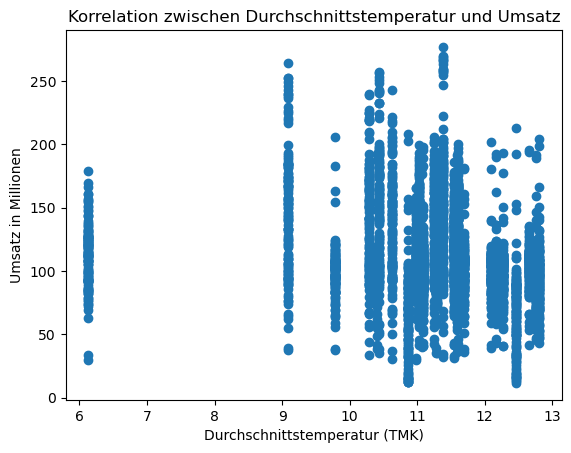

In [93]:
plt.scatter(merged_df[' TMK'], merged_df['Umsatz in millionen'])
plt.title('Korrelation zwischen Durchschnittstemperatur und Umsatz')
plt.xlabel('Durchschnittstemperatur (TMK)')
plt.ylabel('Umsatz in Millionen')
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

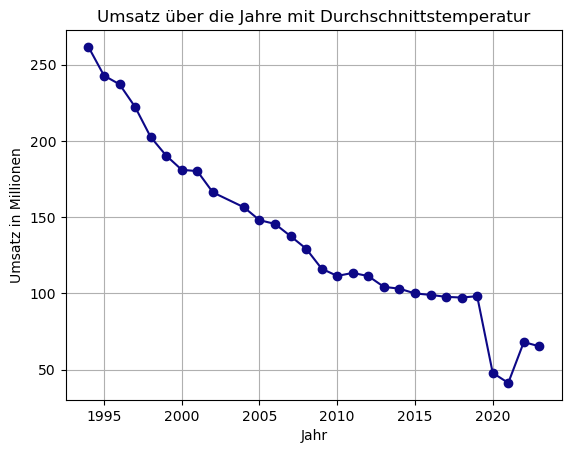

In [94]:
grouped = merged_df.groupby('Gastro_Description')

# Festlegen einer Farbskala basierend auf der Durchschnittstemperatur
cmap = plt.get_cmap('plasma')
colors = iter(cmap(np.linspace(0, 1, len(grouped))))

# Iterieren über jede einzigartige Gastro-ID und Erstellen eines Liniendiagramms für jede Gruppe
for name, group in grouped:
    # Gruppieren der Daten dieser Gastro-ID nach Jahr und Berechnen des Durchschnitts des Umsatzes und von TMK
    grouped_year = group.groupby('Jahr').agg({'Umsatz in millionen': 'mean', ' TMK': 'mean'}).reset_index()
    
    # Erstellen des Liniendiagramms für diese Gastro-ID mit Farbskala basierend auf der Durchschnittstemperatur
    plt.plot(grouped_year['Jahr'], grouped_year['Umsatz in millionen'], marker='o', color=next(colors), label=f'Gastro_Description {name}')
    plt.title('Umsatz über die Jahre mit Durchschnittstemperatur')
    plt.xlabel('Jahr')
    plt.ylabel('Umsatz in Millionen')
    plt.grid(True)
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Durchschnittstemperatur')
    plt.legend()
    plt.show()


In [95]:
correlation = merged_df['Umsatz in millionen'].corr(merged_df[' TMK'])

print("Korrelationskoeffizient zwischen Temperatur und Jahresumsatz:", correlation)


Korrelationskoeffizient zwischen Temperatur und Jahresumsatz: -0.17373881150325693


In [96]:
# Berechnen der Korrelation zwischen Durchschnittstemperatur und Umsatz der Campingplätze
correlation = df_gastro['Umsatz in millionen'].corr(merged_df[' TMK'])
print("Korrelationskoeffizient zwischen Durchschnittstemperatur und Umsatz der Campingplätze:", correlation)

# Prüfen auf einen Zusammenhang mit zeitlicher Verzögerung
lags = range(1, 13)  # Mögliche Verzögerungen von 1 bis 12 Monaten
correlation_with_lags = []
for lag in lags:
    # Verzögerte Durchschnittstemperatur um `lag` Monate
    df_camping['TMK_delayed'] = merged_df[' TMK'].shift(periods=lag)
    # Berechnen der Korrelation zwischen verzögerter Durchschnittstemperatur und Umsatz
    correlation_with_lags.append(df_camping['Umsatz in millionen'].corr(df_camping['TMK_delayed']))

# Ermitteln des Lags mit der höchsten Korrelation
max_correlation_index = np.argmax(correlation_with_lags)
lag_with_max_correlation = lags[max_correlation_index]
max_correlation = correlation_with_lags[max_correlation_index]

print("Maximale Korrelation mit Lag von", lag_with_max_correlation, "Monaten:", max_correlation)


Korrelationskoeffizient zwischen Durchschnittstemperatur und Umsatz der Campingplätze: -0.19711142207546697
Maximale Korrelation mit Lag von 1 Monaten: nan
